<a href="https://colab.research.google.com/github/SibiSenthur/Data-Structures/blob/master/Indeed_Model_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importing the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
from scipy import stats
from scipy.stats import norm, skew #for some statistics

**# Loading and Preparing the Data**

In [13]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
# Importing the datafile and preparing the data; I have imported the dataset into Colab Notebooks residing within my google drive.
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PS_Homework_data_set.csv', sep = ',')
df.shape
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.head(10)
# Slicing a sample of data; checking if there exists any duplicates in the dataframe
boolean = df.duplicated(subset=['advertiser_id']).any() 
print(boolean, end='\n\n')
# No duplicates leads exist in my dataframe;

False



In [15]:
#List of columns present in dataset.
df.dtypes

advertiser_id               int64
assigned                    int64
date_assignment_starts     object
date_assignment_ends       object
first_revenue_date         object
date_created               object
age                         int64
assign_days                 int64
revenue                   float64
dtype: object

**# Question 1**

In [20]:
# How many leads are represented in this data - assigned and unassigned populations. average revenue of each group.
df.shape[0] 
# As, there are no duplicate leads present in our dataset; we have in total 77,891 leads.
print(df.groupby('assigned').agg(['count'])['advertiser_id'].reset_index())
# Of the 77,891 leads 40,812 leads are not assigned and 37,079 leads are assigned.
# More leads are unassigned rather than assigned.
df.groupby('assigned').agg({'revenue':'mean'}).astype('int64').reset_index()

   assigned  count
0         0  40812
1         1  37079


,assigned,revenue
0,0,23889416
1,1,76736860


**Findings Summary**
```
# There are no duplicate leads present in our dataset; we have in total 77,891 leads.
# Of the 77,891 leads 40,812 leads are not assigned and 37,079 leads are assigned.
# More leads are unassigned rather assigned.
# Average revenue for un-assigned leads (without any missing value imputation) is 23.88 M and average revenue for assigned leads is 76.73 M.
```





In [6]:
# Revenue Leads in assigned and un-assigned leads;
print("Percent of revenue values (not null) present in assigned leads", "{:.2f}".format(df[df['assigned'] == 1]['revenue'].notnull().sum()/len(df[df['assigned']==1])*100))
print("Percent of revenue values present (not null) in un-assigned leads", "{:.2f}".format(df[df['assigned'] == 0]['revenue'].notnull().sum()/len(df[df['assigned']==0])*100))

Percent of revenue values (not null) present in assigned leads 4.22
Percent of revenue values present (not null) in un-assigned leads 4.35


**Summary - Non null revenue values**
```
# Percentage of non null revenue values present in assigned leads 4.22
# Percentage of non null revenue values present in un-assigned leads 4.35
# Given most of the revenue values are null, we need to consider two scenarios where revenue values are greater than zero and another scenario where null revenue values are replaced by zero.
```

In [8]:
# Consider replacing the null values with zero;
df['revenue'] = df['revenue'].fillna(0)
df.groupby('assigned').agg({'revenue':'mean'}).astype('int64').reset_index()
# Based on the assumption that missing revenue values are 0: 
# After assigned the missing revenue values with zero and calculating the mean revenue, we see that assigned leads have an average revenue of 3.3 M
# Unassigned leads have a revenue of approximately 1M. 

,assigned,revenue
0,0,1039001
1,1,3238846


** Summary-Average revenue in Million of assigned leads vs un-assigned leads**
```
# Imputing the missing revenue values as zero;
# Average revenue of un-assigned leads is 1.03 M
# Average revenue of assigned leads is 3.23 M
```



In [9]:
df.head(5)

,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,0.0
1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,0.0
2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,0.0
3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,0.0
4,1132,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-02,3744,138,0.0


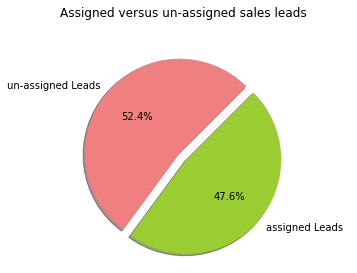

In [21]:
# Pie chart of assigned leads versus un-assigned leads
colors_list = ['lightcoral', 'yellowgreen']
explode_list = [0.1, 0]
labels = ['un-assigned Leads', 'assigned Leads']
sizes = [df['assigned'].value_counts()[0], df['assigned'].value_counts()[1]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=45, autopct='%1.1f%%', colors=colors_list, explode=explode_list, shadow=True)
plt.title('Assigned versus un-assigned sales leads', y=1.12) 
ax1.axis('equal')
plt.show()
# From our analysis, 52% (40,812) of the leads are un-assigned and 48% (37,079) of the leads are assigned.

In [22]:
df.groupby('assigned').agg({'revenue':'mean'}).astype('int64').reset_index()

,assigned,revenue
0,0,23889416
1,1,76736860


In [24]:
df.groupby(
    ['assigned']
).agg(
    { # Find the min, max, and sum of the revenue column 
        'revenue': [min, max, sum],
        # find the number of leads
        'advertiser_id': "count",
        # minimum, first, and number of unique dates
        'age': [min, max]}).astype('int64').reset_index()

assigned revenue                           advertiser_id age      
               min         max           sum         count min   max
0        0   13000  6533791000   42403713465         40812   0  3097
1        1   12000  2500000000  120093187404         37079 -27  3855

In [25]:
revenue_leads_assigned = df[df['assigned'] == 1].groupby('assigned')['revenue'].sum().astype('int64').reset_index()
revenue_leads_not_assigned = df[df['assigned'] == 0].groupby('assigned')['revenue'].sum().astype('int64').reset_index()
print(revenue_leads_assigned['revenue'] - revenue_leads_not_assigned['revenue']) 
## Total Revenue difference for leads assigned and leads not-assigned is 77,689,473,939

0    77689473939
Name: revenue, dtype: int64


In [ ]:
# Question 2

In [27]:
# Deducing the relationship Account age and income;
# From our analysis, as the age of the account increases, revenue shows an steady increase in trend, exception being if the age of account is around 7 years or 9 years;

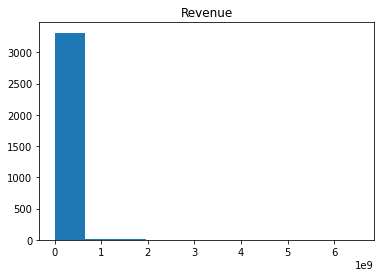

count    3.340000e+03
mean     4.865177e+07
std      1.736891e+08
min      1.200000e+04
25%      6.398444e+06
50%      1.514775e+07
75%      3.704959e+07
max      6.533791e+09
Name: revenue, dtype: float64

Skewness observed in revenue data :  19.73


<Figure size 432x288 with 0 Axes>

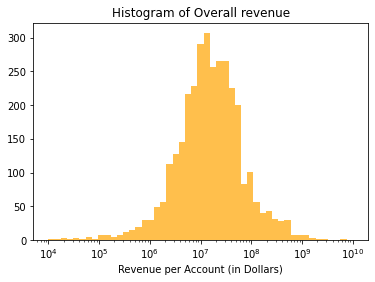

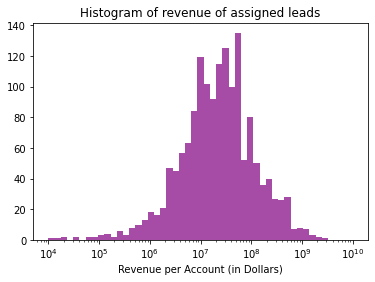

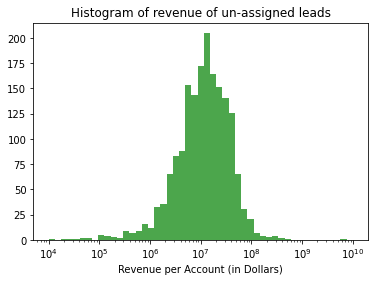

<Figure size 432x288 with 0 Axes>

In [43]:
# Understanding a few distributions
plt.hist(df_assumption1['revenue'])
plt.title("Revenue")
plt.show()
print(df_assumption1['revenue'].describe())
print( '\nSkewness observed in revenue data : ', "{:.2f}".format(skew(df_assumption1['revenue'])))

plt.hist(df_assumption1['revenue'], bins=np.logspace(np.log10(10000), np.log10(10000000000), 50), facecolor='orange', alpha=0.7, rwidth = 1)
plt.gca().set_xscale("log")
plt.title('Histogram of Overall revenue')
plt.xlabel('Revenue per Account (in Dollars)')
plt.figure()

plt.hist(df_assumption1[df_assumption1['assigned'] == 1]['revenue'], bins=np.logspace(np.log10(10000),np.log10(10000000000), 50), facecolor='purple', alpha=0.7, rwidth = 1)
plt.gca().set_xscale("log")
plt.title('Histogram of revenue of assigned leads')
plt.xlabel('Revenue per Account (in Dollars)')
plt.figure()

plt.hist(df_assumption1[df_assumption1['assigned'] == 0]['revenue'], bins=np.logspace(np.log10(10000),np.log10(10000000000), 50), facecolor='green', alpha=0.7, rwidth = 1)
plt.gca().set_xscale("log")
plt.title('Histogram of revenue of un-assigned leads')
plt.xlabel('Revenue per Account (in Dollars)')
plt.figure()

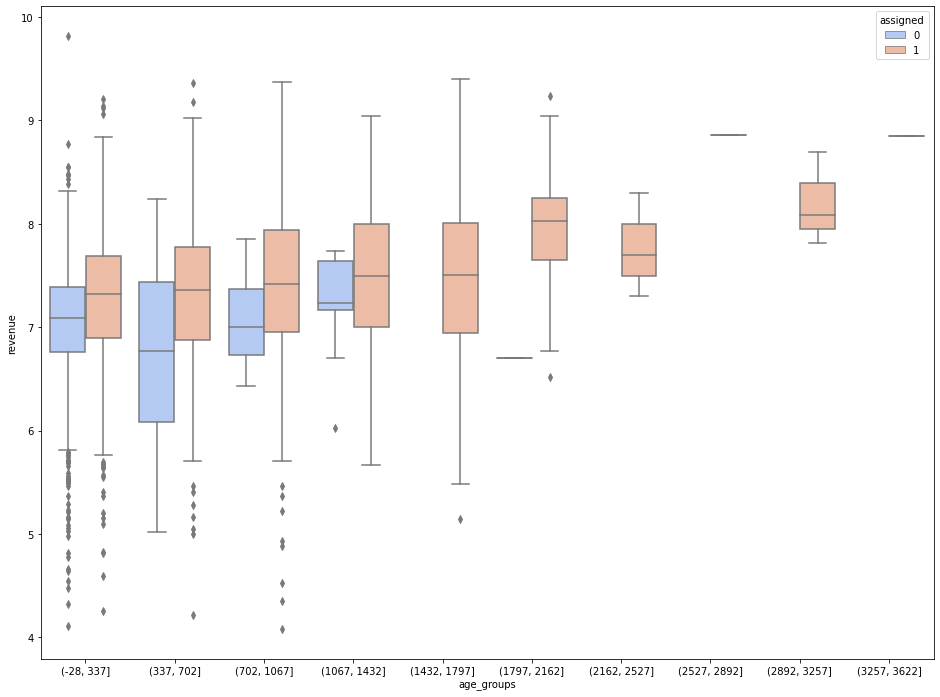

In [47]:
from scipy.stats import pearsonr
df_assumption1 = df[df['revenue'] > 0].copy()
df_assumption1['age_groups'] = pd.cut(df_assumption1['age'], bins = np.arange(-28,3856,365))
plt.figure(figsize=(16,12))
sns.boxplot(x="age_groups", y=np.log10(df_assumption1['revenue']), hue="assigned",data=df_assumption1, palette="coolwarm")

Text(0.5, 1.0, 'Average revenue for different account ages')

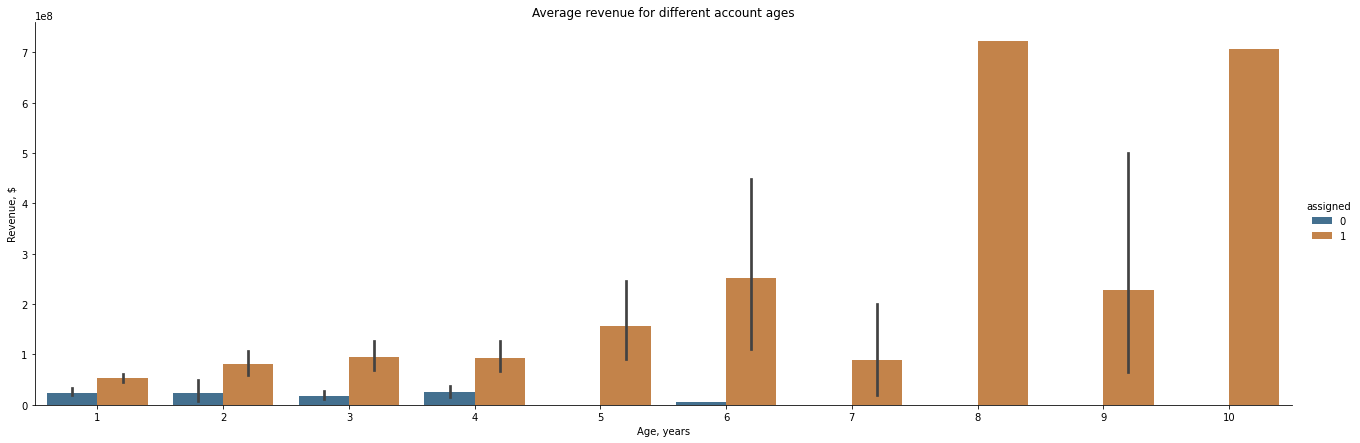

In [28]:
# Checking misssing revenue values for assigned leads versus non-assigned leads
df_assumption1 = df[df['revenue'] > 0].copy()
df_assumption1['age_groups'] = pd.cut(df_assumption1['age'], bins = np.arange(-28,3856,365))
g = sns.factorplot(data = df_assumption1, x = 'age_groups', y = 'revenue', hue="assigned", saturation=.5,\
               kind="bar", ci=95, aspect=3, size = 6)
g.set_axis_labels("Age, years", "Revenue, $").set_xticklabels(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
plt.title('Average revenue for different account ages')

In [ ]:
# Binning age attribute to seggregate into age groups; We have 10 different age group binned across assignmed category;
df_assumption1['age_groups'] = pd.cut(df_assumption1['age'], bins = np.arange(-28,3856,365))
df_assumption1['age_groups'].value_counts()
df_assumption1.groupby(['assigned', 'age_groups']).agg({ 'advertiser_id': 'count', 'revenue':'mean',}).astype('float64').reset_index()

,assigned,age_groups,advertiser_id,revenue
0,0,"(-28, 337]",1731.0,2.395796e+07
1,0,"(337, 702]",15.0,2.326418e+07
2,0,"(702, 1067]",19.0,1.823070e+07
3,0,"(1067, 1432]",9.0,2.579433e+07
4,0,"(1432, 1797]",0.0,NaN
5,0,"(1797, 2162]",1.0,4.983000e+06
6,0,"(2162, 2527]",0.0,NaN
7,0,"(2527, 2892]",0.0,NaN
8,0,"(2892, 3257]",0.0,NaN
9,0,"(3257, 3622]",0.0,NaN


Text(0.5, 1.0, 'Average revenue for different account ages')

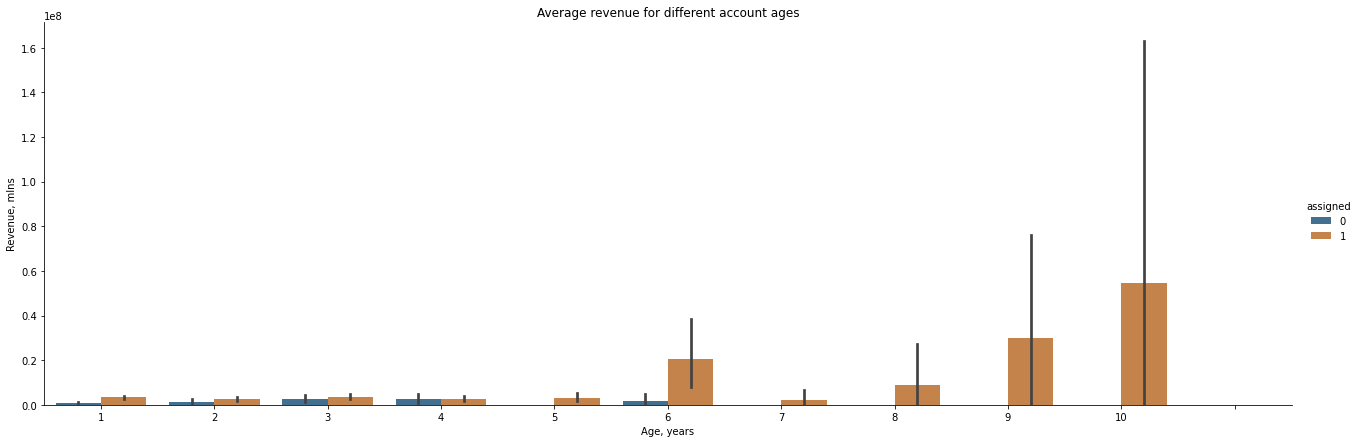

In [ ]:
# When all the revenue values are included in the analysis;
df_assumption2 = df.copy()
df_assumption2['age_groups'] = pd.cut(df_assumption2['age'], bins = np.arange(-28,4000,365))
g = sns.factorplot(data = df_assumption2, x = 'age_groups', y = 'revenue', hue="assigned", saturation=.5,\
               kind="bar", ci=95, aspect=3, size = 6)
g.set_axis_labels("Age, years", "Revenue, mlns").set_xticklabels(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
plt.title('Average revenue for different account ages')



```
**# Question 4**
** Incremental value of assiging a lead to the sales team can broken into two scenarios
Scenario1 - When revenue is greater than zero (df_Assumption1)
Scenario2 - When zero revenue values are included/replacing the null revenue values to zero (df_Assumption2)```
** We are using Z-statistics to evaluate  the incremental revenue impact. Z-statistics is primarily used when the same size is large(~greater than 30) and the population standard deviation is know to us. Given the above scenarios being satisfied we use Z-statistics to model our results.
```



In [ ]:
# Scenario 1 - Where revenue greater than 0;

age_groups_A1 = df_assumption1[df_assumption1['assigned'] == 1].groupby(by = 'age_groups')['revenue']
age_groups_U1 = df_assumption1[df_assumption1['assigned'] == 0].groupby(by = 'age_groups')['revenue']
a1 = age_groups_A1.mean() 
b1 = age_groups_A1.count()
c1 = age_groups_U1.mean()
d1 = age_groups_U1.count()
data = pd.DataFrame({'A.Average_Revenue_assigned': a1, 'B.Count': b1,'C.Average_Revenue_unassigned' : c1, 'D.Count': d1})
data

,A.Average_Revenue_assigned,B.Count,C.Average_Revenue_unassigned,D.Count
age_groups,,,,
"(-28, 337]",5.354200e+07,813,2.395796e+07,1731
"(337, 702]",8.128602e+07,306,2.326418e+07,15
"(702, 1067]",9.509629e+07,224,1.823070e+07,19
"(1067, 1432]",9.379932e+07,121,2.579433e+07,9
"(1432, 1797]",1.563850e+08,71,NaN,0
"(1797, 2162]",2.522057e+08,22,4.983000e+06,1
"(2162, 2527]",8.994033e+07,3,NaN,0
"(2527, 2892]",7.235660e+08,1,NaN,0
"(2892, 3257]",2.287960e+08,3,NaN,0


In [ ]:
avg_A_Dlrs1 = age_groups_A1.mean()
avg_U_Dlrs1 = age_groups_U1.mean()

Conf_table1 = pd.DataFrame({'Avg_A_Dlrs': avg_A_Dlrs1, 'Avg_U_Dlrs': avg_U_Dlrs1})

Conf_table1['Difference_Dlrs'] = Conf_table1['Avg_A_Dlrs'] - Conf_table1['Avg_U_Dlrs']

Conf_table1['Count_A'] = age_groups_A1.count()
Conf_table1['Count_U'] = age_groups_U1.count()

Variance_A = age_groups_A1.var()
Variance_U = age_groups_U1.var()

st_dev = (Variance_A/Conf_table1['Count_A']+ Variance_U/Conf_table1['Count_U'])

Conf_table1['St_dev_sampling_distr'] = np.sqrt(st_dev)

Conf_table1['Conf_interval_from'] = Conf_table1['Difference_Dlrs'] - 1.96 * Conf_table1['St_dev_sampling_distr']
Conf_table1['Conf_interval_to'] = Conf_table1['Difference_Dlrs'] + 1.96 * Conf_table1['St_dev_sampling_distr']

Conf_table1 # Printing the confidence table to show the incremental revenue impact for leads assigned and leads not assigned;

,Avg_A_Dlrs,Avg_U_Dlrs,Difference_Dlrs,Count_A,Count_U,St_dev_sampling_distr,Conf_interval_from,Conf_interval_to
age_groups,,,,,,,,
"(-28, 337]",5.354200e+07,2.395796e+07,2.958403e+07,813,1731,5.799476e+06,1.821706e+07,4.095100e+07
"(337, 702]",8.128602e+07,2.326418e+07,5.802184e+07,306,15,1.637644e+07,2.592402e+07,9.011967e+07
"(702, 1067]",9.509629e+07,1.823070e+07,7.686559e+07,224,19,1.518949e+07,4.709418e+07,1.066370e+08
"(1067, 1432]",9.379932e+07,2.579433e+07,6.800498e+07,121,9,1.655770e+07,3.555189e+07,1.004581e+08
"(1432, 1797]",1.563850e+08,NaN,NaN,71,0,NaN,NaN,NaN
"(1797, 2162]",2.522057e+08,4.983000e+06,2.472227e+08,22,1,NaN,NaN,NaN
"(2162, 2527]",8.994033e+07,NaN,NaN,3,0,NaN,NaN,NaN
"(2527, 2892]",7.235660e+08,NaN,NaN,1,0,NaN,NaN,NaN
"(2892, 3257]",2.287960e+08,NaN,NaN,3,0,NaN,NaN,NaN


```
### ** Results Summary **:
1. The results show the z-score calculation for 95% confidence interval for incremental impact in revenue for leads assigned and leads un-assigned.
2. Based on assumption 1 (When only positive revenue values are considered); the revenue difference (in millions) between assigned and un-assigned leads are as follows for different age groups;
  1. YEAR 1 - from +18.2M to +41M
  2. YEAR 2 - from +26M to +90.1M
  3. YEAR 3 - from +47M to +106.6M    
  4. YEAR 4 - from +35.5M to +100.5M (Not enough un-assigned samples to derive  a conclusion)
3. From our analysis, based on 95% confidence interval leads with age 1-3 will have a positive incremental revenue impact.
```

In [ ]:
# Scenario - 2: When missing revenue values are encoded as zero's

age_groups_A2 = df_assumption2[df_assumption2['assigned'] == 1].groupby(by = 'age_groups')['revenue']
age_groups_U2 = df_assumption2[df_assumption2['assigned'] == 0].groupby(by = 'age_groups')['revenue']

avg_A_Dlrs2 = age_groups_A2.mean()
avg_U_Dlrs2 = age_groups_U2.mean()

Z_Confidence_table = pd.DataFrame({'Avg_A_Dlrs': avg_A_Dlrs2, 'Avg_U_Dlrs': avg_U_Dlrs2})

Z_Confidence_table['Difference_Dlrs'] = Z_Confidence_table['Avg_A_Dlrs'] - Z_Confidence_table['Avg_U_Dlrs']

Z_Confidence_table['Count_A'] = age_groups_A2.count()
Z_Confidence_table['Count_U'] = age_groups_U2.count()

Variance_A = age_groups_A2.var()
Variance_U = age_groups_U2.var()

st_dev = (Variance_A/Z_Confidence_table['Count_A']+ Variance_U/Z_Confidence_table['Count_U'])

Z_Confidence_table['St_dev_sampling_distr'] = np.sqrt(st_dev)

Z_Confidence_table['Conf_interval_from'] = (Z_Confidence_table['Difference_Dlrs'] - 1.96 * Z_Confidence_table['St_dev_sampling_distr']).astype('float64')
# Z-score for 95 % confidence interval 1.96
Z_Confidence_table['Conf_interval_to'] = (Z_Confidence_table['Difference_Dlrs'] + 1.96 * Z_Confidence_table['St_dev_sampling_distr']).astype('float64')
Z_Confidence_table

,Avg_A_Dlrs,Avg_U_Dlrs,Difference_Dlrs,Count_A,Count_U,St_dev_sampling_distr,Conf_interval_from,Conf_interval_to
age_groups,,,,,,,,
"(-28, 337]",3.304961e+06,1.029037e+06,2.275924e+06,13171,40301,3.351671e+05,1.618996e+06,2.932851e+06
"(337, 702]",2.580509e+06,1.292455e+06,1.288054e+06,9639,270,7.987882e+05,-2.775706e+05,2.853679e+06
"(702, 1067]",3.461418e+06,2.749074e+06,7.123446e+05,6154,126,1.041574e+06,-1.329141e+06,2.753831e+06
"(1067, 1432]",2.721755e+06,2.763679e+06,-4.192386e+04,4170,84,1.200151e+06,-2.394220e+06,2.310372e+06
"(1432, 1797]",3.239958e+06,0.000000e+00,3.239958e+06,3427,22,9.326463e+05,1.411971e+06,5.067944e+06
"(1797, 2162]",2.062649e+07,1.661000e+06,1.896549e+07,269,3,8.392425e+06,2.516338e+06,3.541464e+07
"(2162, 2527]",2.193667e+06,0.000000e+00,2.193667e+06,123,1,NaN,NaN,NaN
"(2527, 2892]",9.044575e+06,0.000000e+00,9.044575e+06,80,4,9.044575e+06,-8.682792e+06,2.677194e+07
"(2892, 3257]",2.984296e+07,0.000000e+00,2.984296e+07,23,1,NaN,NaN,NaN


```
### ** Results Summary **:
1. The results show the z-score calculation for 95% confidence interval for incremental impact in revenue for leads assigned and leads un-assigned
2. Based on assumption 2 (Revenue = 0, when no revenue values are provided); the revenue difference (in millions) between assigned and un-assigned leads are as follows for different age groups;
  1. YEAR 1 - from +1.61M to 2.93M
  2. YEAR 2 - from -0.28M to 2.85M
  3. YEAR 3 - from -1.33M to 2.75M    
  4. YEAR 4 - from -2.39M to 2.31M
  5. YEAR 5 - from +1.41M to 5.08M 
  6. YEAR 6 - from +2.51M to 3.54M (less no of samples of un-assigned leads, only 3 unassigned lead; so we can ignore this scenario)
  7. YEAR 8 - from -8.68M to 26.7M (not enough un-assigned sample leads to derive a conclusion, only 4 unassigned leads; so we can neglect this scenario)
3. Years 1 to years 5 have a better representation (sample size) of assigned leads and un-assigned leads. 
4. From our analysis, years 1 and years 5 don't have a interval including zero; hence we can conclude that there is a positive incremental impact in revenue for years 1 and years 5.
5. From our analysis, we cannot say with 95% confidence for account ages 2,3 and 4 that the incremental value of assigning leads will be positive. 
6. Only for 1 and 5 year old accounts, the incremental value of assigning a lead can be positive.
```

**# Question 5**

In [ ]:
df_subset1 = (len(df_assumption2[(df_assumption2['assign_days']>0) & (df_assumption2['assigned'] == 0)])/(df_assumption2.shape[0]))*100
print("Percentage of un-assigned leads as a fraction of total leads having positive assignment days:", "{:.2f}".format(df_subset1))
df_subset2 = (len((df_assumption2[(df_assumption2['assign_days']>0) & (df_assumption2['assigned'] == 0)]))/len(df_assumption2[(df_assumption2['assigned'] == 0)]))*100
print("Percentage of un-assigned leads as a fraction of total un-assigned leads having positive assignment days:", "{:.2f}".format(df_subset2))
#52 percent of the un-assigned leads have postive assignment days; which seems incorrect;

Percentage of un-assigned leads as a fraction of total leads having positive assignment days: 52.31
Percentage of un-assigned leads as a fraction of total un-assigned leads having positive assignment days: 99.83


In [ ]:
df_assumption2[(df_assumption2['assigned'] == 0)]['assign_days'].describe()

count    40812.000000
mean       124.014971
std         36.355873
min          0.000000
25%        136.000000
50%        137.000000
75%        137.000000
max        138.000000
Name: assign_days, dtype: float64

Percentage (%) of un-assigned leads {135 - 140} days as a fraction of total un-assigned leads having positive assignment days: 87.6
Percentage (%) of un-assigned leads {135 - 140} days as a fraction of total un-assigned leads having positive assignment days: 77.7
Percentage (%) of un-assigned leads as fraction of total un-assigned leads having age equals 0: 95.9
Percentage (%) of assigned leads as fraction of total assigned leads having age equals 0: 9.2


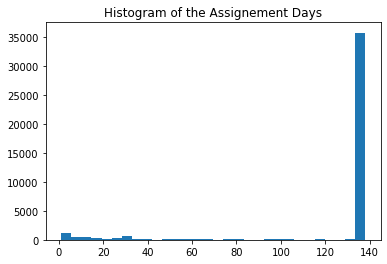

In [ ]:
plt.figure()
plt.hist(df_assumption2['assign_days'][df_assumption2['assign_days']!= 0][df_assumption2['assigned'] == 0], bins=30)
plt.title('Histogram of the Assignement Days')
df_subset2 = (len((df_assumption2[(df_assumption2['assign_days']>135)&(df_assumption2['assign_days']<140) & (df_assumption2['assigned'] == 0)]))/len(df_assumption2[(df_assumption2['assigned'] == 0)]))*100
print("Percentage (%) of un-assigned leads {135 - 140} days as a fraction of total un-assigned leads having positive assignment days:", "{:.1f}".format(df_subset2))
df_subset2_assigned = (len((df_assumption2[(df_assumption2['assign_days']>135)&(df_assumption2['assign_days']<140) & (df_assumption2['assigned'] != 0)]))/len(df_assumption2[(df_assumption2['assigned'] != 0)]))*100
print("Percentage (%) of un-assigned leads {135 - 140} days as a fraction of total un-assigned leads having positive assignment days:", "{:.1f}".format(df_subset2_assigned))
df_subset3 = (len((df_assumption2[(df_assumption2['age'] == 0) & (df_assumption2['assigned'] == 0)]))/len(df_assumption2[(df_assumption2['assigned'] == 0)]))*100
print("Percentage (%) of un-assigned leads as fraction of total un-assigned leads having age equals 0:", "{:.1f}".format(df_subset3))
df_subset3_assigned = (len((df_assumption2[(df_assumption2['age'] == 0) & (df_assumption2['assigned'] != 0)]))/len(df_assumption2[(df_assumption2['assigned'] != 0)]))*100
print("Percentage (%) of assigned leads as fraction of total assigned leads having age equals 0:", "{:.1f}".format(df_subset3_assigned))

***# 87.63% of unassigned leads have assign days between 135 and 140; these leads could be erroneously flagged as unassigned and there could be a possibility that these leads could be assigned.***

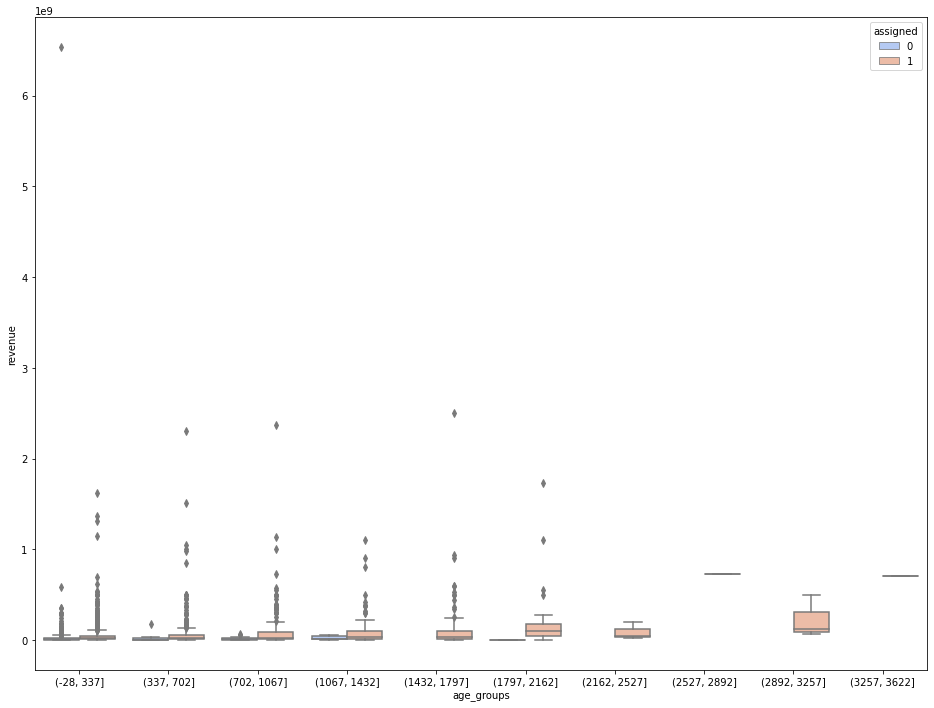

In [ ]:
plt.figure(figsize=(16,12))
sns.boxplot(x="age_groups", y="revenue", hue="assigned",data=df_assumption1, palette="coolwarm")

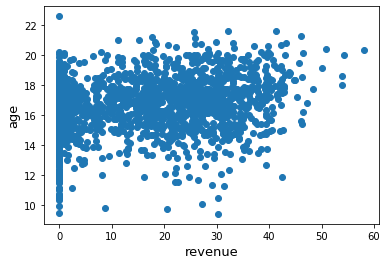

In [ ]:
# Checking the distribution between age and revenue;
df_subset = df[['age','revenue']]
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(np.sqrt(df['age']), np.log(df['revenue']))
plt.ylabel('age', fontsize=13)
plt.xlabel('revenue', fontsize=13)
plt.show()

(77891, 9)

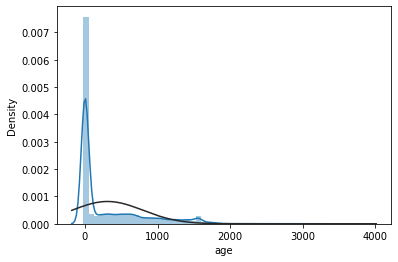

In [ ]:
sns.distplot(df['age'] , fit=norm);
df.shape

In [ ]:
df_drop_null = df.dropna(how='any',axis=0)
df_drop_null.columns

Index(['advertiser_id', 'assigned', 'date_assignment_starts',
       'date_assignment_ends', 'first_revenue_date', 'date_created', 'age',
       'assign_days', 'revenue'],
      dtype='object')

In [ ]:
df_drop_null.shape

(8433, 9)

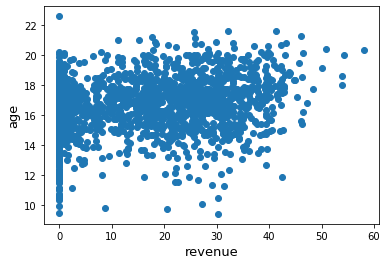

In [ ]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(np.sqrt(df_drop_null['age']), np.log(df_drop_null['revenue']))
plt.ylabel('age', fontsize=13)
plt.xlabel('revenue', fontsize=13)
plt.show()